<a href="https://colab.research.google.com/github/Eman-Fatimah/Titanic-survival-prediction/blob/main/Titanic_Survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## Data Preprocessing

In [ ]:
#loading dataset
df = pd.read_csv('titanic_dataset.csv')

In [ ]:
#shape
df.shape

(418, 12)

In [ ]:
#previewing the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#listing columns
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [ ]:
df = df[['PassengerId','Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived']]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [ ]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

/tmp/ipython-input-10-4092208064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


In [ ]:
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'], inplace = True)

/tmp/ipython-input-11-452112561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'], inplace = True)


In [ ]:
df.columns.values

array(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Survived',
       'FamilySize'], dtype=object)

In [ ]:
#Handling missing values in Age column
df['Age']= df['Age'].fillna(df['Age'].mean())

/tmp/ipython-input-13-128008965.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age']= df['Age'].fillna(df['Age'].mean())


In [ ]:
#Handling missing values in Embarked column
df['Embarked']= df['Embarked'].fillna('S')

/tmp/ipython-input-14-3356213457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Embarked']= df['Embarked'].fillna('S')


In [ ]:
df.head()

,Pclass,Sex,Age,Fare,Embarked,Survived,FamilySize
0,3,male,34.5,7.8292,Q,0,1
1,3,female,47.0,7.0000,S,1,2
2,2,male,62.0,9.6875,Q,0,1
3,3,male,27.0,8.6625,S,0,1
4,3,female,22.0,12.2875,S,1,3


In [ ]:
#handling missing values in fare
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

/tmp/ipython-input-16-45021246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fare'] = df['Fare'].fillna(df['Fare'].mean())


In [ ]:
#changing datatype
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')
df['Age'] = df['Age'].astype('int64')

/tmp/ipython-input-17-1295167723.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Survived'] = df['Survived'].astype('category')
/tmp/ipython-input-17-1295167723.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pclass'] = df['Pclass'].astype('category')
/tmp/ipython-input-17-1295167723.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Pclass      418 non-null    category
 1   Sex         418 non-null    category
 2   Age         418 non-null    int64   
 3   Fare        418 non-null    float64 
 4   Embarked    418 non-null    category
 5   Survived    418 non-null    category
 6   FamilySize  418 non-null    int64   
dtypes: category(4), float64(1), int64(2)
memory usage: 12.1 KB


In [ ]:
df.describe()

,Age,Fare,FamilySize
count,418.000000,418.000000,418.000000
mean,30.191388,35.627188,1.839713
std,12.654104,55.840500,1.519072
min,0.000000,0.000000,1.000000
25%,23.000000,7.895800,1.000000
50%,30.000000,14.454200,1.000000
75%,35.750000,31.500000,2.000000
max,76.000000,512.329200,11.000000


In [ ]:
df['Survived'].value_counts()

,count
Survived,
0,266
1,152


In [ ]:
pclass1_passengers = df[df['Pclass'] == 1]
pclass2_passengers = df[df['Pclass'] == 1]
pclass3_passengers = df[df['Pclass'] == 1]

In [ ]:
#survival count for pclass1
survival_counts1 = pclass1_passengers['Survived'].value_counts()
print(survival_counts1)

#survival count for pclass2
survival_counts2 = pclass2_passengers['Survived'].value_counts()
print(survival_counts2)

#survival count for pclass3
survival_counts3 = pclass3_passengers['Survived'].value_counts()
print(survival_counts3)

Survived
0    57
1    50
Name: count, dtype: int64
Survived
0    57
1    50
Name: count, dtype: int64
Survived
0    57
1    50
Name: count, dtype: int64


In [ ]:
##Feature Transformation

In [ ]:
# Convert categorical features to numerical
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Perform one-hot encoding on 'Embarked' column
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
df.head()

/tmp/ipython-input-24-893661597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


,Pclass,Sex,Age,Fare,Survived,FamilySize,Embarked_Q,Embarked_S
0,3,0,34,7.8292,0,1,True,False
1,3,1,47,7.0000,1,2,False,True
2,2,0,62,9.6875,0,1,True,False
3,3,0,27,8.6625,0,1,False,True
4,3,1,22,12.2875,1,3,False,True


In [ ]:
##Feature Scaling

In [ ]:
# Separate features and target
x = df.drop('Survived', axis=1)
y = df['Survived']

In [ ]:
x

,Pclass,Sex,Age,Fare,FamilySize,Embarked_Q,Embarked_S
0,3,0,34,7.8292,1,True,False
1,3,1,47,7.0000,2,False,True
2,2,0,62,9.6875,1,True,False
3,3,0,27,8.6625,1,False,True
4,3,1,22,12.2875,3,False,True
...,...,...,...,...,...,...,...
413,3,0,30,8.0500,1,False,True
414,1,1,39,108.9000,1,False,False
415,3,0,38,7.2500,1,False,True
416,3,0,30,8.0500,1,False,True


In [ ]:
# Standardize Numerical Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x[['Age', 'Fare', 'FamilySize']] = scaler.fit_transform(x[['Age', 'Fare', 'FamilySize']])

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Choose max depth
depths = range(1, 21)
scores = []

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=0)
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
    scores.append(cv_scores.mean())

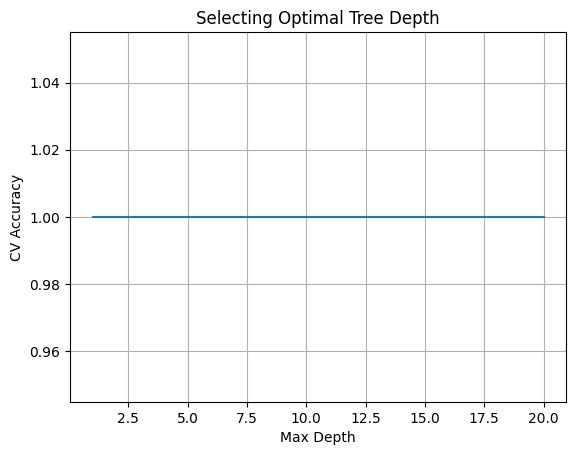

Best max_depth: 1


In [ ]:
#plotting tree depths

plt.plot(depths, scores)
plt.xlabel('Max Depth')
plt.ylabel('CV Accuracy')
plt.title('Selecting Optimal Tree Depth')
plt.grid(True)
plt.show()

best_depth = depths[scores.index(max(scores))]
print(f"Best max_depth: {best_depth}")

In [ ]:
# training the model
clf = DecisionTreeClassifier(max_depth=best_depth, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, random_state=0)

In [ ]:
# evaluate model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Model Accuracy%: {accuracy * 100:.2f}%")

Accuracy: 1.0
Model Accuracy%: 100.00%


In [ ]:
# Save the model
import joblib
joblib.dump(clf, 'titanic_survival_pred_model.pkl')

['titanic_survival_pred_model.pkl']